# Loading and Preparing data

In [29]:
# Required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Setting data directory
os.chdir('C:/Users/stati/OneDrive/Desktop/Research_with_Nobel_vai/Results')

In [31]:
# Define the data types for each column



my_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 
            'fbs', 'restecg', 'thalach', 'exang', 
            'oldpeak', 'slope', 'ca', 'thal', 'num']

In [32]:
clev = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=my_columns)
hung = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data',header=None, names=my_columns)
swit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data',header=None, names=my_columns)
va = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data',header=None, names=my_columns)

In [34]:
# Concatenate the data frames
df = pd.concat([clev, hung, swit,va])

In [35]:
# Print value counts for each column to explore any unusual data points
for column in df.columns:
    print(column, ":\n", df[column].value_counts(), "\n")

age :
 54.0    51
58.0    43
55.0    41
56.0    38
57.0    38
52.0    36
62.0    35
51.0    35
59.0    35
53.0    33
60.0    32
61.0    31
48.0    31
63.0    30
50.0    25
41.0    24
46.0    24
43.0    24
64.0    22
49.0    22
65.0    21
44.0    19
47.0    19
45.0    18
42.0    18
38.0    16
67.0    15
39.0    15
69.0    13
40.0    13
66.0    13
35.0    11
37.0    11
68.0    10
34.0     7
70.0     7
74.0     7
36.0     6
32.0     5
71.0     5
72.0     4
29.0     3
75.0     3
31.0     2
33.0     2
76.0     2
77.0     2
30.0     1
28.0     1
73.0     1
Name: age, dtype: int64 

sex :
 1.0    726
0.0    194
Name: sex, dtype: int64 

cp :
 4.0    496
3.0    204
2.0    174
1.0     46
Name: cp, dtype: int64 

trestbps :
 120      94
130      79
140      70
?        59
110      40
         ..
108       1
129.0     1
113       1
92        1
127       1
Name: trestbps, Length: 103, dtype: int64 

chol :
 0        123
0         49
?         30
220        7
216        7
        ... 
187        1


In [36]:
df.replace('?', float('NaN'), inplace=True)

In [ ]:
# Re-declare data types for appropriate columns
df['age'] = df['age'].astype('int')
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['trestbps'] = df['trestbps'].astype('float')
df['chol'] = df['chol'].astype('float')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['thalach'] = df['thalach'].astype('float')
df['exang'] = df['exang'].astype('category')
df['oldpeak'] = df['oldpeak'].astype('float')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('float')
df['thal'] = df['thal'].astype('float')
df['num'] = df['num'].astype('category')


# Exploratory analysis:

In [41]:
# Check the first few rows of the DataFrame
print(df.head())

   age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak slope  \
0   63  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   3.0   
1   67  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   2.0   
2   67  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   2.0   
3   37  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   3.0   
4   41  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   1.0   

    ca  thal num  
0  0.0   6.0   0  
1  3.0   3.0   2  
2  2.0   7.0   1  
3  0.0   3.0   0  
4  0.0   3.0   0  


In [42]:
# Check the shape of the DataFrame
print(df.shape)

(920, 14)


In [43]:
# Check the data types of the columns
print(df.dtypes)

age            int32
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca           float64
thal         float64
num         category
dtype: object


In [44]:
# Check the summary statistics of the numerical columns
print(df.describe())

              age    trestbps        chol     thalach     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

             thal  
count  434.000000  
mean     5.087558  
std      1.919075  
min      3.000000  
25%      3.000000  
50%      6.000000  
75%      7.000000  
max      7.000000  


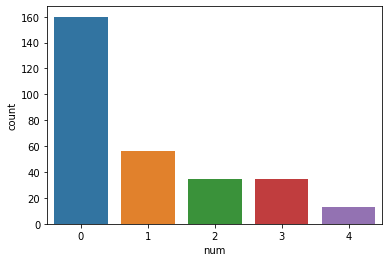

In [54]:
# Check the distribution of the target variable
sns.countplot(x='num', data=df)
plt.show()


In [ ]:
# Number of missing value per columns

In [50]:
# Count the number of missing values per column
missing_values_count = df.isna().sum()

# Print the result
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [49]:
# Remove missing entries from DataFrame
df = df.dropna()

In [52]:
print(df.shape)

(299, 14)


In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


So, we clened the data set and found 299 complete sample to fit our Machine learing models. As the categories are unbalance then we can use weighted multinomial classification models. We would try the following three supervised models:

1. Logistic Regression [Simplest one but many cases most effect and easy to interpret.]
2. Random forest [Tree based algorithm]
3. XGBoost [Effective in may cases]
4. Neural Network (Basic)
5. CNN [Not yet sure]

# ML modeling:

In progress ... 